In [1]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)


@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

In [2]:
from skimage import data
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt

In [3]:
image = data.astronaut()

In [4]:
image.shape

(512, 512, 3)

In [5]:
try:
    plt.imshow(filters.sobel(image))
except ValueError as e:
    print(e)

The parameter `image` must be a 2-dimensional array


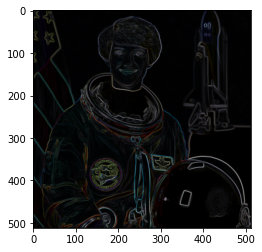

In [6]:
plt.imshow(sobel_each(image))
plt.show()

Text(0.5, 1.0, 'Sobel filter computed\n on value converted image (HSV)')

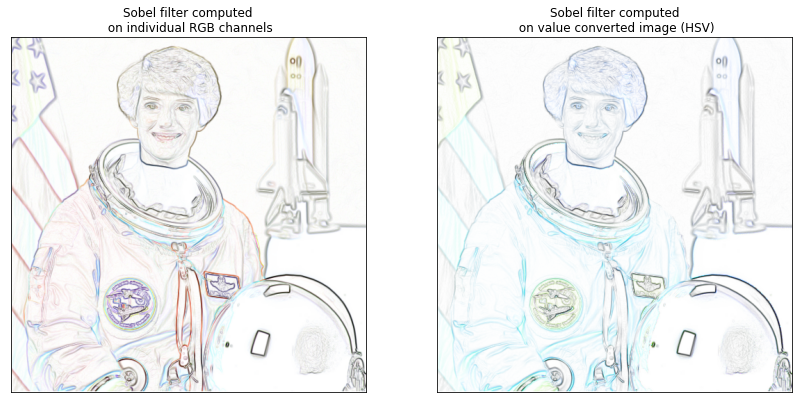

In [7]:
fig, (ax_each, ax_hsv) = plt.subplots(ncols=2, figsize=(14, 7))

# We use 1 - sobel_each(image) but this won't work if image is not normalized
ax_each.imshow(rescale_intensity(1 - sobel_each(image)))
ax_each.set_xticks([]), ax_each.set_yticks([])
ax_each.set_title("Sobel filter computed\n on individual RGB channels")

# We use 1 - sobel_hsv(image) but this won't work if image is not normalized
ax_hsv.imshow(rescale_intensity(1 - sobel_hsv(image)))
ax_hsv.set_xticks([]), ax_hsv.set_yticks([])
ax_hsv.set_title("Sobel filter computed\n on value converted image (HSV)")